In [414]:
pip install cvxpy

In [415]:
import cvxpy as cvx
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [416]:
tickers = ['NVDA','V','HMC','KO','AAPL','AMZN','BLDR','LLY','TMHC','ETH-USD','CX','SO']

In [417]:
prices = yf.download(tickers, start="2019-01-01", end="2024-01-01")["Adj Close"]
prices.dropna(inplace = True)
prices.head()

[*********************100%%**********************]  12 of 12 completed


Ticker,AAPL,AMZN,BLDR,CX,ETH-USD,HMC,KO,LLY,NVDA,SO,TMHC,V
Date,,,,,,,,,,,,
2019-01-02,37.845039,76.956497,11.51,4.903199,155.047684,23.749645,40.147366,105.797379,33.790485,35.536831,16.480000,128.224472
2019-01-03,34.075390,75.014000,11.48,4.794678,149.135010,23.426767,39.899284,102.509605,31.748959,36.040787,16.549999,123.603676
2019-01-04,35.530048,78.769501,12.10,4.844005,154.581940,24.494066,40.694866,105.594772,33.783035,36.341526,17.389999,128.928635
2019-01-07,35.450970,81.475502,12.50,5.001855,151.699219,24.951481,40.164471,106.165749,35.571529,36.260254,18.040001,131.253525
2019-01-08,36.126770,82.829002,12.59,5.139973,150.359634,25.543425,40.617878,107.141914,34.685966,37.292542,18.290001,131.967377


In [418]:
returns = prices.pct_change().dropna()
returns

Ticker,AAPL,AMZN,BLDR,CX,ETH-USD,HMC,KO,LLY,NVDA,SO,TMHC,V
Date,,,,,,,,,,,,
2019-01-03,-0.099607,-0.025241,-0.002606,-0.022133,-0.038135,-0.013595,-0.006179,-0.031076,-0.060417,0.014181,0.004248,-0.036037
2019-01-04,0.042689,0.050064,0.054007,0.010288,0.036523,0.045559,0.019940,0.030096,0.064068,0.008344,0.050755,0.043081
2019-01-07,-0.002226,0.034353,0.033058,0.032587,-0.018648,0.018675,-0.013033,0.005407,0.052941,-0.002236,0.037378,0.018032
2019-01-08,0.019063,0.016612,0.007200,0.027613,-0.008831,0.023724,0.011289,0.009195,-0.024895,0.028469,0.013858,0.005439
2019-01-09,0.016982,0.001714,0.027006,0.017274,0.002949,0.007725,-0.019166,0.007478,0.019667,-0.008501,0.018589,0.011769
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.005547,-0.002730,0.015916,0.014833,0.038839,0.000982,0.005691,-0.002815,-0.003266,0.001009,0.006933,-0.004277
2023-12-26,-0.002841,-0.000065,0.008371,-0.009744,-0.040859,0.000327,0.004115,0.000491,0.009195,0.000144,0.004466,0.002825
2023-12-27,0.000518,-0.000456,0.011385,-0.003690,0.065999,-0.002941,0.002561,0.018995,0.002800,-0.000576,0.004446,-0.000888


### Matriz de varianzas y covarianzas

In [419]:
cov_matrix = returns.cov()
cov_matrix

Ticker,AAPL,AMZN,BLDR,CX,ETH-USD,HMC,KO,LLY,NVDA,SO,TMHC,V
Ticker,,,,,,,,,,,,
AAPL,0.000412,0.000279,0.000305,0.000244,0.000293,0.000145,0.000119,0.000136,0.000435,0.000125,0.000313,0.000221
AMZN,0.000279,0.000492,0.000264,0.000201,0.000303,0.000120,0.000074,0.000101,0.000436,0.000077,0.000249,0.000170
BLDR,0.000305,0.000264,0.001094,0.000492,0.000453,0.000267,0.000167,0.000122,0.000483,0.000171,0.000836,0.000303
CX,0.000244,0.000201,0.000492,0.000965,0.000409,0.000233,0.000154,0.000126,0.000363,0.000166,0.000471,0.000259
ETH-USD,0.000293,0.000303,0.000453,0.000409,0.002945,0.000181,0.000107,0.000106,0.000493,0.000127,0.000470,0.000252
HMC,0.000145,0.000120,0.000267,0.000233,0.000181,0.000277,0.000096,0.000074,0.000225,0.000105,0.000263,0.000152
KO,0.000119,0.000074,0.000167,0.000154,0.000107,0.000096,0.000182,0.000094,0.000117,0.000142,0.000191,0.000134
LLY,0.000136,0.000101,0.000122,0.000126,0.000106,0.000074,0.000094,0.000382,0.000153,0.000124,0.000126,0.000116
NVDA,0.000435,0.000436,0.000483,0.000363,0.000493,0.000225,0.000117,0.000153,0.001064,0.000124,0.000466,0.000305


# Optimización del portafolio


In [420]:
#weights = cvx.Variable(len(tickers),1, name='weights')
weights = cvx.Variable(len(tickers))
weights

Variable((12,))

In [421]:
# Calculamos el promedio de los retornos diarios
expected_returns = np.array(returns.mean())
expected_returns

array([0.00150012, 0.00078714, 0.00267647, 0.0008458 , 0.00363887,
       0.00034807, 0.00039677, 0.00154464, 0.00266598, 0.0006766 ,
       0.00153373, 0.00071771])

In [422]:
#Funcion Objetivo
target_return = 0.1
rf = 0.05
#Definir la expresión para maximizar los retorno
objective = cvx.Maximize(expected_returns.T @ weights)

#Definir la expresión para maximizar la utilidad
#objective = cvx.Maximize(expected_returns.T @ weights - cvx.quad_form(weights, cov_matrix) * 0.5)

# Definir la expresión de maximización del Ratio de Sharpe
#objective = cvx.Maximize((expected_returns.T @ weights - rf) / cvx.sqrt(weights.T @ cov_matrix @ weights))

# Definir la expresión para minimizar la varianza
#objective = cvx.Minimize(cvx.quad_form(weights, cov_matrix))


In [423]:
#Restricciones

constraints = [
    cvx.sum(weights) == 1,  # Suma de pesos igual a 1 (100% del portafolio)
    weights >= 0,  # Pesos no negativos
    weights[tickers.index('AAPL')] >= 0.3,  # Límite inferior de asignación del 33% para Apple
    weights[tickers.index('AAPL')] <= 0.4,  # Límite superior de asignación del 50% para Apple

    weights[tickers.index('ETH-USD')] >= 0.1,  # Peso mínimo de 0.1 para ETH en el portafolio
]

# Restricciones para los activos diferentes de 'Apple'
for ticker in tickers:
    if ticker != 'AAPL':
        constraints.append(weights[tickers.index(ticker)] <= 0.2)  # Peso máximo de 0.2 para activos distintos a Apple


In [424]:
#Optimización
problem = cvx.Problem(objective, constraints)
result = problem.solve()

In [425]:
#Imprimimos los resultados
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {weights.value[i]*100:.2f}%")

NVDA: 0.00%
V: 0.00%
HMC: 20.00%
KO: 0.00%
AAPL: 40.00%
AMZN: 0.00%
BLDR: 0.00%
LLY: 10.00%
TMHC: 20.00%
ETH-USD: 10.00%
CX: 0.00%
SO: 0.00%


## Composición del portafolio ($100 000 de capital inicial)

In [426]:
# Con un capital para invertir de $100K
prec_ini_acc = prices.iloc[0,:]

acc_iniciales = weights * 100000 / prec_ini_acc
acc = list(acc_iniciales.value)

acc_portafolio = []

for i in acc:
  if i > 0.01:
    acc_portafolio.append(i)

acc_portafolio

[1737.619426177503,
 257.9851503630592,
 94.5202919780253,
 591.8825896503057,
 281.39819314018604]

# Análisis estadístico

In [427]:
activos_en_portafolio = []

for i in range(len(tickers)):
    if weights[i].value > 0.01:
        activos_en_portafolio.append((tickers[i]))

data = prices[activos_en_portafolio]

activos_en_portafolio

['HMC', 'AAPL', 'LLY', 'TMHC', 'ETH-USD']

Ticker          HMC         AAPL          LLY         TMHC      ETH-USD
count   1258.000000  1258.000000  1258.000000  1258.000000  1258.000000
mean      26.392341   121.413823   245.966565    28.358275  1410.754928
std        3.175105    46.758670   136.166396     8.688939  1167.407594
min       18.362354    34.075390    99.434715     7.050000   104.535301
25%       24.019842    75.294868   134.489647    23.242500   233.784420
50%       25.922564   132.488823   222.072495    26.780001  1484.156250
75%       28.876565   158.011353   321.205467    31.547500  1976.003113
max       36.669998   197.857529   616.906860    54.220001  4812.087402


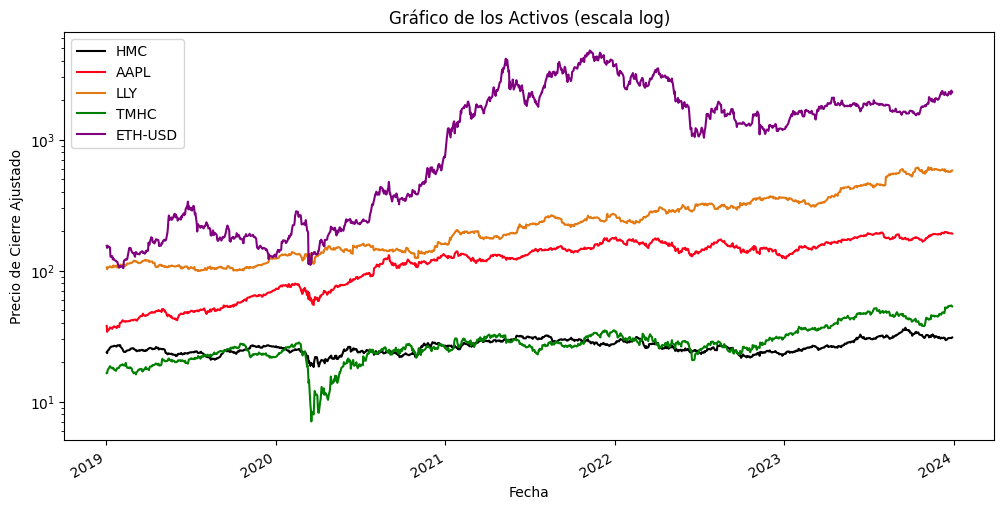

In [428]:
# Análisis descriptivo
statistics = data.describe()
print(statistics)

colores = ['#000000', '#FE001A', '#E47911', 'green','purple']

# Gráfico de líneas
plt.figure(figsize=(12, 6))
for i, col in enumerate(data.columns):
    data[col].plot(color=colores[i % len(colores)], label=col)

plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado')
plt.title('Gráfico de los Activos (escala log)')
plt.legend()
plt.yscale('log')
plt.show()

# Cálculo del VaR y CVaR

In [429]:
from scipy.stats import norm

# Cálculo del VaR individual al 95%

# Vector de número de acciones
nAsset = acc_portafolio

# Valor de posición inicial de cada activo
position_value = data.iloc[0] * nAsset

# Rendimientos diarios de los activos
returns = data.pct_change().dropna()
returns_mean = returns.mean()
returns_std = returns.std()

# Cálculo de la matriz de covarianza
covariance_matrix = returns.cov()
covarrelation_matrix = returns.corr()

# 1. Cálculo del VaR paramétrico al 95%
z_score = norm.ppf(0.05)  # Cuantil correspondiente al nivel de confianza de 95%
var_parametric = position_value *returns_std * z_score

# 2. Cálculo del VaR histórico al 95%
var_historical = returns.quantile(0.05) * position_value

# 3. Cálculo del VaR mediante simulación de Monte Carlo al 95%
# Iniciamos la simulacion de montecarlo
var_montecarlo = np.zeros(len(activos_en_portafolio))
T = 1  # Tiempo hasta el vencimiento
N = 100  # Número de pasos en la simulación de Monte Carlo
M = 10000  # Número de trayectorias de Monte Carlo
dt = T / N

for i in range(len(activos_en_portafolio)):

    # Definir los parámetros de los activos
    S0 = position_value[i] / 100  # Precio inicial del activo subyacente
    r = returns_mean[i]*252  # Tasa libre de riesgo
    sigma = returns_std[i]*(252**0.5)  # Volatilidad del activo subyacente

    # Simulación de Monte Carlo
    S_t = np.zeros((M, N + 1))
    S_t[:, 0] = S0
    for j in range(1, N + 1):
        S_t[:, j] = S_t[:, j - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.normal(size=M))

    returns_MC = np.diff(S_t, axis=1) / S_t[:, :-1]
    returns_SMC = returns_MC[:, -1]

    # Cálculo del VaR SMC al 95%
    var_montecarlo[i] = np.percentile(returns_SMC, 5) * position_value[i]

# Tabla de resultados comparativos
var_comparison = pd.DataFrame({'VaR Paramétrico': var_parametric, 'VaR Histórico': var_historical, 'VaR Monte Carlo': var_montecarlo})
var_comparison.index = activos_en_portafolio
print("\nTabla de Comparación de VaR al 95% de confianza:")
print(var_comparison)



Tabla de Comparación de VaR al 95% de confianza:
         VaR Paramétrico  VaR Histórico  VaR Monte Carlo
HMC         -1130.532737   -1061.525512     -1710.468052
AAPL         -326.101099    -299.674306      -483.057097
LLY          -321.550331    -252.059514      -464.049308
TMHC         -550.192344    -428.445734      -824.397006
ETH-USD     -3894.393751   -3208.866376     -5660.772322


In [430]:
# Cálculo del VaR de portafolio al 95% para cada metodología
portfolio_var_parametric = np.sqrt(np.dot(np.dot(var_parametric, covarrelation_matrix), var_parametric.T))
portfolio_var_historical = np.sqrt(np.dot(np.dot(var_historical, covarrelation_matrix), var_historical.T))
portfolio_var_montecarlo = np.sqrt(np.dot(np.dot(var_montecarlo, covarrelation_matrix), var_montecarlo.T))

# Tabla de resultados comparativos
var_comparison_portfolio = pd.DataFrame({
    'VaR Paramétrico': portfolio_var_parametric,
    'VaR Histórico': portfolio_var_historical,
    'VaR Monte Carlo': portfolio_var_montecarlo
}, index=['Portafolio'])
print("\nTabla de Comparación del VaR de Portafolio al 95% de confianza:")
print(var_comparison_portfolio)


Tabla de Comparación del VaR de Portafolio al 95% de confianza:
            VaR Paramétrico  VaR Histórico  VaR Monte Carlo
Portafolio      4698.877862    3938.439087      6879.712969


## Backtesting del VaR paramétrico de Apple al 95% de confianza

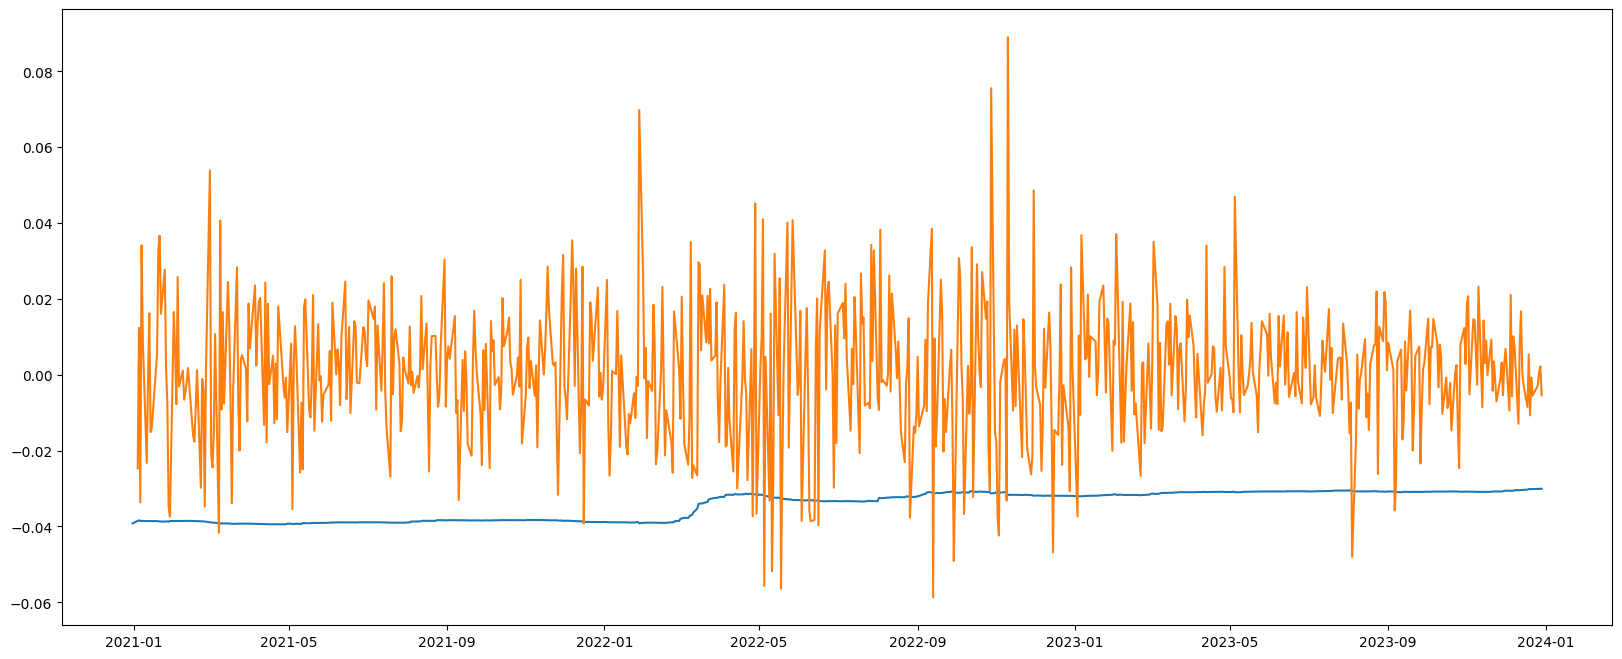

In [431]:
rolling_std_hmc = returns['HMC'].rolling(window=252*2).std()  # 252 días de trading en un año
# Multiplicar la desviación estándar muestral por la inversa de la distribución normal estándar
var_hmc = (rolling_std_hmc * z_score).dropna()

rolling_std_apple = returns['AAPL'].rolling(window=252*2).std()  # 252 días de trading en un año
# Multiplicar la desviación estándar muestral por la inversa de la distribución normal estándar
var_apple = (rolling_std_apple * z_score).dropna()

rolling_std_lly = returns['LLY'].rolling(window=252*2).std()  # 252 días de trading en un año
# Multiplicar la desviación estándar muestral por la inversa de la distribución normal estándar
var_lly = (rolling_std_lly * z_score).dropna()

rolling_std_tmhc = returns['TMHC'].rolling(window=252*2).std()  # 252 días de trading en un año
# Multiplicar la desviación estándar muestral por la inversa de la distribución normal estándar
var_tmhc = (rolling_std_tmhc * z_score).dropna()

rolling_std_eth = returns['ETH-USD'].rolling(window=252*2).std()  # 252 días de trading en un año
# Multiplicar la desviación estándar muestral por la inversa de la distribución normal estándar
var_eth = (rolling_std_eth * z_score).dropna()

plt.figure(figsize = (20,8))
plt.plot(var_apple)
plt.plot(returns['AAPL'].iloc[504:])

# Bechmark del portafolio con el S&P500

In [432]:
pesos = [0.2,0.33,0.2,0.17,0.1]

# Calcular el rendimiento diario del portafolio
portfolio_returns = returns.dot(pesos)
portfolio_returns

Date
2019-01-03   -0.044896
2019-01-04    0.041499
2019-01-07    0.008571
2019-01-08    0.014347
2019-01-09    0.012100
                ...   
2023-12-22    0.002865
2023-12-26   -0.004101
2023-12-27    0.010737
2023-12-28   -0.000857
2023-12-29   -0.003143
Length: 1257, dtype: float64

In [433]:
# Calcular el rendimiento acumulado del portafolio
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
rend_portafolio = cumulative_returns[-1]

print(f'Rendimiento del portafolio: +{rend_portafolio:0.2%}')

Rendimiento del portafolio: +447.76%


In [434]:
# Data del S&P500
prices = yf.download('SPY', start="2019-01-01", end="2024-01-01")["Adj Close"]
prices

[*********************100%%**********************]  1 of 1 completed


Date
2019-01-02    230.557465
2019-01-03    225.055740
2019-01-04    232.594086
2019-01-07    234.428055
2019-01-08    236.630554
                 ...    
2023-12-22    473.649994
2023-12-26    475.649994
2023-12-27    476.510010
2023-12-28    476.690002
2023-12-29    475.309998
Name: Adj Close, Length: 1258, dtype: float64

In [435]:
# Rendimientos diarios del S&P500
rend_diarios_sp500 = prices.pct_change().dropna()
rend_diarios_sp500

Date
2019-01-03   -0.023863
2019-01-04    0.033495
2019-01-07    0.007885
2019-01-08    0.009395
2019-01-09    0.004674
                ...   
2023-12-22    0.002010
2023-12-26    0.004223
2023-12-27    0.001808
2023-12-28    0.000378
2023-12-29   -0.002895
Name: Adj Close, Length: 1257, dtype: float64

In [436]:
# Rendimiento acumulado S&P500
rend_acum_sp500 = (1 + rend_diarios_sp500).cumprod() - 1
rend_sp500 = rend_acum_sp500[-1]

print(f'Rendimiento del S&P500: +{rend_sp500:0.2%}')

Rendimiento del S&P500: +106.16%


### Gráfico comparativo

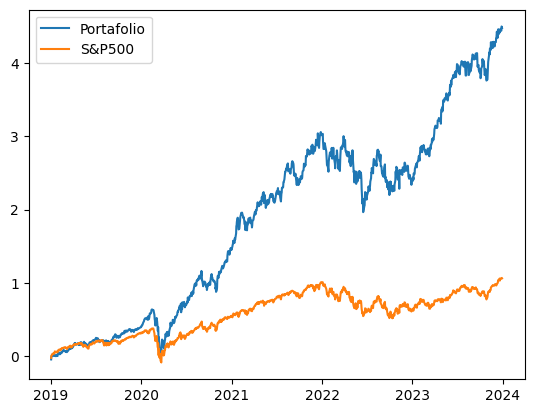

In [437]:
plt.plot(cumulative_returns, label = 'Portafolio')
plt.plot(rend_acum_sp500, label = 'S&P500')
plt.legend()